In [1]:
import random
import cv2
import re

from matplotlib import pyplot as plt
from tkinter import filedialog

import albumentations as A
import tkinter as tk

In [ ]:
test = filedialog.askopenfilenames()[0]
testName = re.search(r"(.+)\.", test)[1]

In [14]:
BOX_COLOR = (0, 0, 255)  # Black
TEXT_COLOR = (255, 255, 255)  # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(
        class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1
    )
    cv2.rectangle(
        img,
        (x_min, y_min - int(1.3 * text_height)),
        (x_min + text_width, y_min),
        BOX_COLOR,
        -1,
    )
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis("off")
    plt.imshow(img)

In [17]:
image = cv2.imread(test)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
toolBoundingBoxData = f"{testName}.txt"
bboxes = []
category_ids=[]
category_id_to_name = {}
tools_found = set()
index = 0

with open(toolBoundingBoxData) as f:
    lines = f.readlines()

for line in lines:
    toolLabel, *dimensions = line.split()
    x, y, width, height = [int(dimension) for dimension in dimensions]
    print(toolLabel, x, y, width, height, "\n")
    bboxes.append([x, y, width, height])
    if toolLabel not in tools_found:
        tools_found.union(toolLabel)
        category_ids.append(index)
        category_id_to_name[index]=toolLabel
        index+=1
    

    
print(bboxes, category_id_to_name)

10000681 416 285 117 804 

10000718_1 417 1367 731 324 

[[416, 285, 117, 804], [417, 1367, 731, 324]] {0: '10000681', 1: '10000718_1'}


In [19]:
# bboxes = [[x, y, width, height]]
# category_ids = [17, 18]

# # We will use the mapping from category_id to the class name
# # to visualize the class label for the bounding box on the image
# category_id_to_name = {17: '10000718_1', 18: '10000681'}

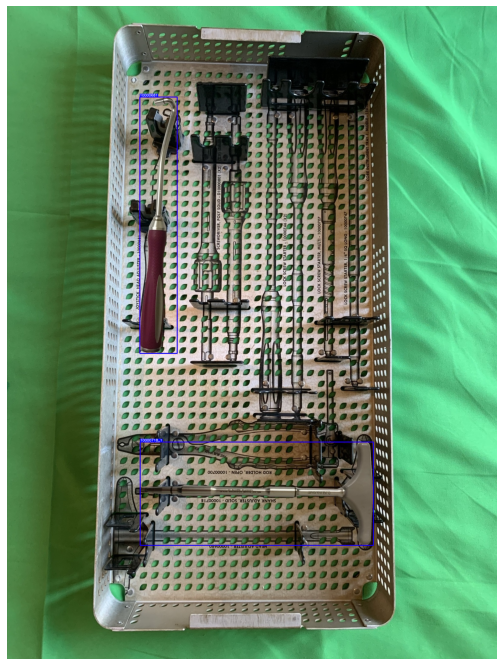

In [20]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [21]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

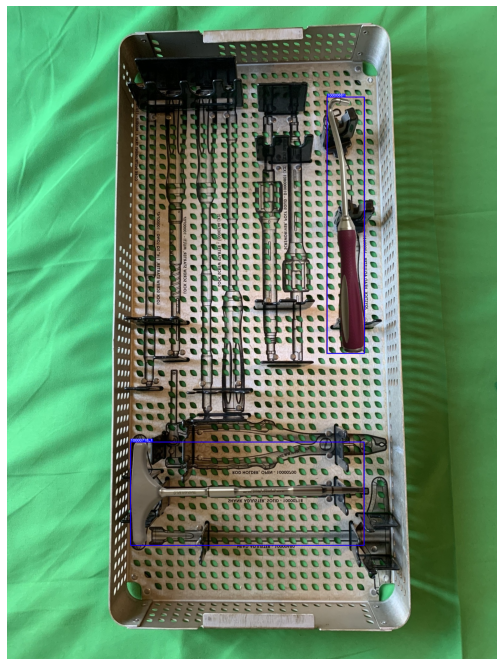

In [23]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)